In [89]:
import pandas as pd
import numpy as np
import os

In [90]:
df=pd.read_csv('/content/Dev_data_to_be_shared.csv')
df.describe()
df_val=pd.read_csv('/content/validation_data_to_be_shared.csv')

In [91]:
df.head()

,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,221000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,25000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,86000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,215000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


### keep only the top 100 features

In [92]:
# cols_to_keep = missing_values.index[:400].tolist()
# cols_to_keep.append('bad_flag')
# df = df.loc[:, df.columns.intersection(cols_to_keep)]

# df

### Check the % of missing values

In [93]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    "Column": df.columns,
    "Missing Values": missing_values,
    "Percentage Missing": missing_percentage
}).sort_values(by="Percentage Missing", ascending=True)

print("\nBottom 100 Columns with Missing Values:")
print(missing_df.head(100))


Bottom 100 Columns with Missing Values:
                              Column  Missing Values  Percentage Missing
account_number        account_number               0            0.000000
onus_attribute_40  onus_attribute_40               0            0.000000
onus_attribute_39  onus_attribute_39               0            0.000000
onus_attribute_38  onus_attribute_38               0            0.000000
onus_attribute_37  onus_attribute_37               0            0.000000
...                              ...             ...                 ...
bureau_226                bureau_226            1193            1.232362
bureau_225                bureau_225            1193            1.232362
bureau_224                bureau_224            1193            1.232362
bureau_201                bureau_201            1193            1.232362
bureau_202                bureau_202            1193            1.232362

[100 rows x 3 columns]


In [94]:
cols_to_drop = missing_percentage[missing_percentage > 1.232362].index
df = df.drop(columns=cols_to_drop)
df_val = df_val.drop(columns=cols_to_drop)

In [95]:
df.head()

,account_number,bad_flag,bureau_1,bureau_2,bureau_3,bureau_4,bureau_5,bureau_6,bureau_7,bureau_8,...,onus_attribute_33,onus_attribute_34,onus_attribute_35,onus_attribute_36,onus_attribute_37,onus_attribute_38,onus_attribute_39,onus_attribute_40,onus_attribute_41,onus_attribute_42
0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0.0,1.0,0.0,0.0,0.0,22.0,6.0,22.0,...,1,1,0,0,0,5,3,2,0,0
2,3,0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0.0,4.0,0.0,0.0,0.0,7.0,8.0,7.0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,1.0,0.0,4.0,0.0,0.0,0.0,18.0,5.0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
# the feature to be predicted is : bad_flag
df['bad_flag'].value_counts()

,count
bad_flag,
0,95434
1,1372


### Fill the empty values with median values

In [97]:
for column in df.columns:
    if df[column].isnull().any():
        df[column].fillna(df[column].median(), inplace=True)

<ipython-input-97-ec0ee28944b8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


In [98]:
for column in df_val.columns:
    if df_val[column].isnull().any():
        df_val[column].fillna(df_val[column].median(), inplace=True)

<ipython-input-98-1bb29c67442b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_val[column].fillna(df_val[column].median(), inplace=True)


In [99]:
df

,account_number,bad_flag,bureau_1,bureau_2,bureau_3,bureau_4,bureau_5,bureau_6,bureau_7,bureau_8,...,onus_attribute_33,onus_attribute_34,onus_attribute_35,onus_attribute_36,onus_attribute_37,onus_attribute_38,onus_attribute_39,onus_attribute_40,onus_attribute_41,onus_attribute_42
0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0.0,1.0,0.0,0.0,0.0,22.0,6.0,22.0,...,1,1,0,0,0,5,3,2,0,0
2,3,0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0.0,4.0,0.0,0.0,0.0,7.0,8.0,7.0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,1.0,0.0,4.0,0.0,0.0,0.0,18.0,5.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96801,96802,0,0.0,1.0,0.0,0.0,4.0,1.0,3.0,5.0,...,0,0,0,0,0,2,0,0,1,0
96802,96803,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,1,0,4,2,1,0,1
96803,96804,0,0.0,0.0,1.0,0.0,0.0,0.0,12.0,1.0,...,1,0,0,0,0,5,1,0,0,0
96804,96805,0,2.0,2.0,0.0,0.0,2.0,0.0,6.0,4.0,...,0,0,0,0,0,0,0,0,0,1


In [100]:
X = df.drop(columns=['bad_flag', 'account_number'])
y = df['bad_flag']

In [101]:
account_numbers = df_val['account_number']

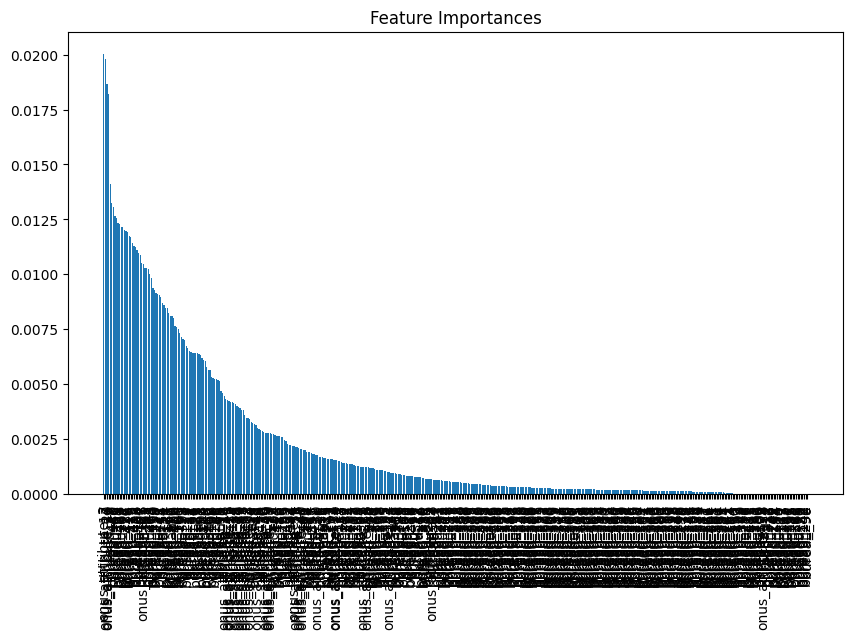

In [102]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Fit a Random Forest model to evaluate feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Plot feature importances
importances = rf.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices])
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=90)
plt.title('Feature Importances')
plt.show()

# Keep top 20 important features
top_features = feature_names[sorted_indices][:100]
X = X[top_features]
df_val = df_val[top_features]


### PCA to reduce dimentionality

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separate features and target
# X = df.drop(columns=['bad_flag'])
# y = df['bad_flag']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA to explain 95% variance
pca = PCA(n_components=0.97, random_state=42)
pca.fit(X_scaled)

# Get the contribution of each feature to the principal components
pca_components = pd.DataFrame(pca.components_, columns=X.columns)

# Calculate the overall contribution of each feature across all components
feature_contribution = pca_components.abs().sum(axis=0)

# Normalize the contributions to a percentage scale
normalized_contribution = (feature_contribution / feature_contribution.sum()) * 100

# Identify features with negligible contribution (<1%)
low_contributing_features = normalized_contribution[normalized_contribution < 1].index.tolist()

# Print results
print(f"Number of features with <1% contribution: {len(low_contributing_features)}")
print(f"Features to drop: {low_contributing_features}")

Number of features with <1% contribution: 52
Features to drop: ['onus_attribute_2', 'onus_attribute_17', 'onus_attribute_23', 'onus_attribute_20', 'bureau_429', 'bureau_430', 'bureau_398', 'bureau_428', 'bureau_62', 'bureau_397', 'bureau_127', 'bureau_126', 'bureau_418', 'bureau_419', 'bureau_125', 'bureau_408', 'bureau_407', 'bureau_123', 'onus_attribute_5', 'bureau_65', 'bureau_395', 'bureau_405', 'bureau_12', 'bureau_11', 'bureau_115', 'bureau_9', 'bureau_116', 'bureau_106', 'bureau_105', 'bureau_21', 'bureau_393', 'bureau_22', 'bureau_113', 'bureau_31', 'bureau_33', 'bureau_34', 'bureau_96', 'bureau_7', 'bureau_95', 'bureau_29', 'bureau_2', 'bureau_8', 'bureau_10', 'onus_attribute_13', 'onus_attribute_41', 'onus_attribute_16', 'onus_attribute_25', 'onus_attribute_35', 'onus_attribute_22', 'onus_attribute_38', 'onus_attribute_32', 'bureau_48']


In [104]:
X.drop(columns=low_contributing_features,inplace=True)
df_val.drop(columns=low_contributing_features,inplace=True)

In [105]:
X.sample(10)

,bureau_59,bureau_66,bureau_61,bureau_415,bureau_417,bureau_426,bureau_64,bureau_421,bureau_63,bureau_410,...,bureau_83,bureau_57,bureau_403,onus_attribute_33,bureau_114,bureau_5,bureau_138,onus_attribute_42,bureau_78,bureau_420
59527,124444.0,86423.0,124444.0,8.500000,8.500000,29.875000,103125.000000,0.000000,357000.0,0.000000,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.000000
46866,0.0,0.0,0.0,0.000000,12.000000,0.000000,0.000000,8.500000,0.0,8.500000,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.000000
39849,62099.0,16537.0,62099.0,9.600000,12.000000,9.600000,16000.000000,2.400000,80000.0,2.400000,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.000000
6844,162552.0,115575.0,443360.0,5.710526,9.447368,9.526316,13473.684210,7.447368,114000.0,3.736842,...,1.0,0.0,0.0,0,0.0,0.0,0.0,0,1.0,0.000000
43710,7321.0,7321.0,83732.0,2.785714,6.142857,2.785714,5714.285714,2.571429,41000.0,2.571429,...,1.0,0.0,0.0,0,0.0,1.0,0.0,0,0.0,0.000000
66714,4550.0,4550.0,4550.0,44.400000,44.400000,123.800000,89000.000000,0.000000,400000.0,0.000000,...,0.0,0.0,0.0,0,0.0,0.0,24.0,0,0.0,0.000000
75391,164649.0,100002.0,985044.0,32.739130,34.000000,75.217391,27130.478260,26.956522,182001.0,1.260870,...,1.0,0.0,0.0,0,0.0,0.0,5.0,0,0.0,6.739130
12290,0.0,0.0,0.0,0.000000,0.000000,193.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0,0.0,0.0,193.0,0,0.0,0.000000
61596,29885.0,29885.0,29885.0,24.222222,24.222222,24.222222,9888.888889,0.000000,89000.0,0.000000,...,0.0,0.0,0.0,0,0.0,0.0,23.0,0,0.0,22.111111
68930,19554.0,-10.0,19554.0,17.571429,17.571429,50.000000,31928.571430,0.000000,129000.0,0.000000,...,0.0,0.0,0.0,0,0.0,0.0,44.0,0,0.0,6.285714


In [106]:
y.value_counts()

,count
bad_flag,
0,95434
1,1372


In [107]:
## Use SMOTE to slightly oversample the minority class
from imblearn.over_sampling import SMOTE

# Resample the minority class to have 5% of the majority class
smote = SMOTE(sampling_strategy=0.03, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new dataframe with the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['bad_flag'] = y_resampled

# Check the class distribution after resampling
print(df_resampled['bad_flag'].value_counts())

# Update the original dataframe
df = df_resampled

bad_flag
0    95434
1     2863
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


### Create a custom validation set with equal representation

In [108]:
# Separate examples based on 'bad_flag' value
bad_flag_1 = df[df['bad_flag'] == 1]
bad_flag_0 = df[df['bad_flag'] == 0]

# Create the validation set with 50 examples of each class
validation_1 = bad_flag_1.sample(n=50, random_state=42)
validation_0 = bad_flag_0.sample(n=50, random_state=42)
validation_set = pd.concat([validation_1, validation_0])

# Remove validation examples from the original data to create the training set
train_set = df.drop(validation_set.index)

# Verify the split
print(f"Validation set shape: {validation_set.shape}")
print(f"Training set shape: {train_set.shape}")


Validation set shape: (100, 49)
Training set shape: (98197, 49)


In [113]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Separate features and target
X_train = train_set.drop(columns=['bad_flag'])
y_train = train_set['bad_flag']
X_val = validation_set.drop(columns=['bad_flag'])
y_val = validation_set['bad_flag']

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(
        scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
        n_estimators=300,
        learning_rate=0.01, random_state=42,max_depth=5
    ),
    "LightGBM": lgb.LGBMClassifier(random_state=42, learning_rate = 0.09999999999999999, num_leaves = 140, max_depth = 7, min_data_in_leaf = 90, feature_fraction = 1.0, bagging_fraction = 0.6, bagging_freq = 9, lambda_l1 = 0.6813174254848325, lambda_l2 = 0.5207786112761885
                                   )
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")

    # Fit the model
    if model_name == "XGBoost":
        model.fit(X_train, y_train, verbose=1)
    else:
        model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_val_pred_proba = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else y_val_pred

    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    auc = roc_auc_score(y_val, y_val_pred_proba)

    # Store results
    results[model_name] = {
        "Training Accuracy": train_accuracy,
        "Validation Accuracy": val_accuracy,
        "AUC-ROC": auc
    }

    # Print results
    print(f"{model_name} - Training Accuracy: {train_accuracy:.2f}, Validation Accuracy: {val_accuracy:.2f}, AUC-ROC: {auc:.2f}")
    print(classification_report(y_val, y_val_pred))



Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Logistic Regression - Training Accuracy: 0.97, Validation Accuracy: 0.50, AUC-ROC: 0.70
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        50
           1       0.00      0.00      0.00        50

    accuracy                           0.50       100
   macro avg       0.25      0.50      0.33       100
weighted avg       0.25      0.50      0.33       100


Training Decision Tree...
Decision Tree - Training Accuracy: 1.00, Validation Accuracy: 0.77, AUC-ROC: 0.76
              precision    recall  f1-score   support

           0       0.70      0.94      0.80        50
           1       0.91      0.60      0.72        50

    accuracy                           0.77       100
   macro avg       0.81      0.77      0.76       100
weighted avg       0.81      0.77      0.76       100


Training Random Forest...
Random Forest - Training Accuracy: 1.00, Validation Accuracy: 0.72, AUC-ROC: 0.96
              precision    recall  f1-sc

In [110]:
# Initialize XGBoost model
xgboost_model = xgb.XGBClassifier(
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
    n_estimators=300,
    learning_rate=0.01,
    random_state=42,
    max_depth=5
)

# Train XGBoost model
print("\nTraining XGBoost...")
xgboost_model.fit(X_train, y_train, verbose=1)

# Predictions
y_train_pred = xgboost_model.predict(X_train)
y_val_pred = xgboost_model.predict(X_val)
y_val_pred_proba = xgboost_model.predict_proba(X_val)[:, 1]

# Calculate metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
auc = roc_auc_score(y_val, y_val_pred_proba)

# Print results
print(f"XGBoost - Training Accuracy: {train_accuracy:.2f}, Validation Accuracy: {val_accuracy:.2f}, AUC-ROC: {auc:.2f}")


Training XGBoost...
XGBoost - Training Accuracy: 0.79, Validation Accuracy: 0.88, AUC-ROC: 0.91


In [111]:
# Get probability predictions using the trained model
y_pred_proba = xgboost_model.predict_proba(df_val)[:, 1]  # Get probability of class 1

# Create output dataframe
output_df = pd.DataFrame({
    'account_number': account_numbers,
    'predicted_probability': y_pred_proba
})

# Round probabilities to 4 decimal places
output_df['predicted_probability'] = output_df['predicted_probability'].round(4)

# Sort by account_number
output_df = output_df.sort_values('account_number')

# Save to CSV
output_df.to_csv('predictions.csv', index=False)

# Display first few rows
print("\nFirst few predictions:")
print(output_df.head())

print("\nShape of output:", output_df.shape)


First few predictions:
   account_number  predicted_probability
0          100001                 0.5973
1          100002                 0.2183
2          100003                 0.1499
3          100004                 0.1316
4          100005                 0.5500

Shape of output: (41792, 2)
